
The purpose of this assignment is to write small finite state
morphologies and phonologies.  Work in Python, using the
definition methodology.  See the notebook for Russian for the
pattern of solution.

Problems 1 and 2 list forms from the languages Lamba and Tagalog.  In
each problem, construct in a finite state lexicon that has the
following form.  Use these exact names for the transducers you define.
Submit a notebook and a pdf of a run of the notebook.


In [76]:
import hfst_dev as hfst
import graphviz
import random

In [77]:
import random

def sample_input(x,n=5,cycles=3):
        x2 = x.copy()
        x2.input_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))
def sample_output(x,n=5,cycles=3):
        x2 = x.copy()
        x2.output_project()
        x2.minimize()
        return(random.sample(set(x2.extract_paths(max_cycles=3).keys()),n))

In [78]:
def apply_rules(u,rs):
    m = hfst.regex(" ".join([x for x in u]))
    print(list(m.extract_paths(max_cycles=3).keys())[0])
    for r in rs:
        m.compose(r)
        m.output_project()
        m.minimize()
        print(list(m.extract_paths(max_cycles=3).keys())[0])

In [79]:
def parse(u,Lexicon): 
    um = hfst.regex(" ".join([x for x in u]))
    inv = Lexicon.copy()
    inv.invert()
    um.compose(inv)
    um.output_project()
    um.minimize()
    return(list(um.extract_paths(max_cycles=3).keys()))

# 1 FOR LAMBA


(i) Morpheme relation

A relation LambaM or TagalogM that has a multi-character symbol
corresponding to an English gloss on the upper side, and an underlying
spelling for the language on the lower side.  For instance suppose
that in your analysis the underlying spelling of WATER is {aa}.  Then
you should see behavior like this in foma.

set print-space ON;
regex [WATER .o. LambaM].l
print words
a a

The symbol WATER has been mapped the to the underlying spelling {aa}.

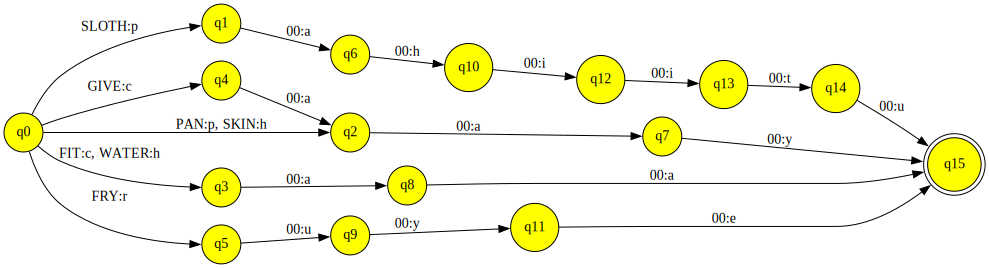

In [80]:
Lamba_expr_N = ''' [WATER .x. {haa}]  |
[SLOTH .x. {pahiitu}] |
[PAN .x. {pay}] |
[SKIN .x. {hay}]'''

Lamba_expr_V = '''
[FIT .x. {caa}] |
[GIVE .x. {caay}] |
[FRY .x. {ruye}]
'''

LambaN = hfst.regex(Lamba_expr_N)
LambaV = hfst.regex(Lamba_expr_V)
LambaM = hfst.regex(Lamba_expr_N + ' | ' + Lamba_expr_V)
LambaM.view()

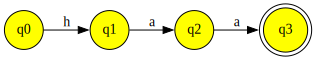

In [81]:
defs = {'LambaN':LambaN , 'LambaV':LambaV, 'LambaM':LambaM}
Lamba1 = hfst.regex('[WATER .o. LambaM].l', definitions=defs)
Lamba1.view()

(ii) A set LambaPHRASE or TagalogPHRASE of underling morpheme
sequences for the examples in the table.  Each element is a sequence
abstract morphemes.  You need to figure out the optimal order, and
define the phrases using a Foma definition or sequence of definitions.
For instance if '1STGEN' and 'PAN' are morphemes, the underlying form
of 'capay' in could be '1STGEN PAN' or 'PAN 1STGEN', and this should
be an element of LambaPHRASE. (1STGEN is supposed to suggest first
person genitive.)

 Nouns

comment: i would assume here that noun is equal to the noun

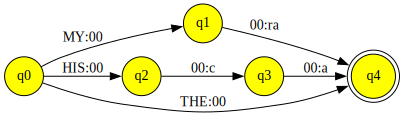

In [82]:
Left_str_L = """
[[HIS:0] 0:c 0:a ] | 
[[THE:0]] |
[[MY:0] 0:ra ] 
"""
Left_L = hfst.regex(Left_str_L)
Left_L.view()

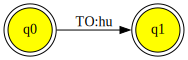

In [83]:
Right_str_L = """
[ TO: hu ] |
[ 0:0 ]
"""
Right_L = hfst.regex(Right_str_L)
Right_L.view()

Verbs

comment: i'm constructing the nouns and the verbs in different way and take the union of two languages. (disjunct)

In [84]:
Left_str_V = """
[[HE:0] 0:ca ] | 
[[I:0] 0:ra ] 
"""
Left_V = hfst.regex(Left_str_V)

Right_str_V = """
[0:0] | 
[[IT:0] 0:ra ] 
"""
Right_V = hfst.regex(Right_str_V)

In [85]:
LambaPHRASE = Left_L.copy()
LambaPHRASE.input_project()

separator = hfst.regex('" ":0')
separator_up = separator.copy()
separator_up.input_project()

LambaN_up = LambaN.copy()
LambaN_up.input_project()

right_up = Right_L.copy()
right_up.input_project()

LambaPHRASE.concatenate(separator_up)
LambaPHRASE.concatenate(LambaN_up)
LambaPHRASE.concatenate(separator_up)
LambaPHRASE.concatenate(right_up)

#  verbs
V_PHRASE = Left_V.copy()
V_PHRASE.input_project()

V_PHRASE.concatenate(separator_up)
V_PHRASE.concatenate(LambaV)
V_PHRASE.concatenate(separator_up)

right_up_V = Right_V.copy()
V_PHRASE.concatenate(right_up_V)

V1 = V_PHRASE.copy()
LambaPHRASE.disjunct(V1)

In [86]:
sample_input(LambaPHRASE)

['HIS WATER ', 'THE SKIN TO', 'HIS WATER TO', 'I GIVE ', 'MY PAN TO']

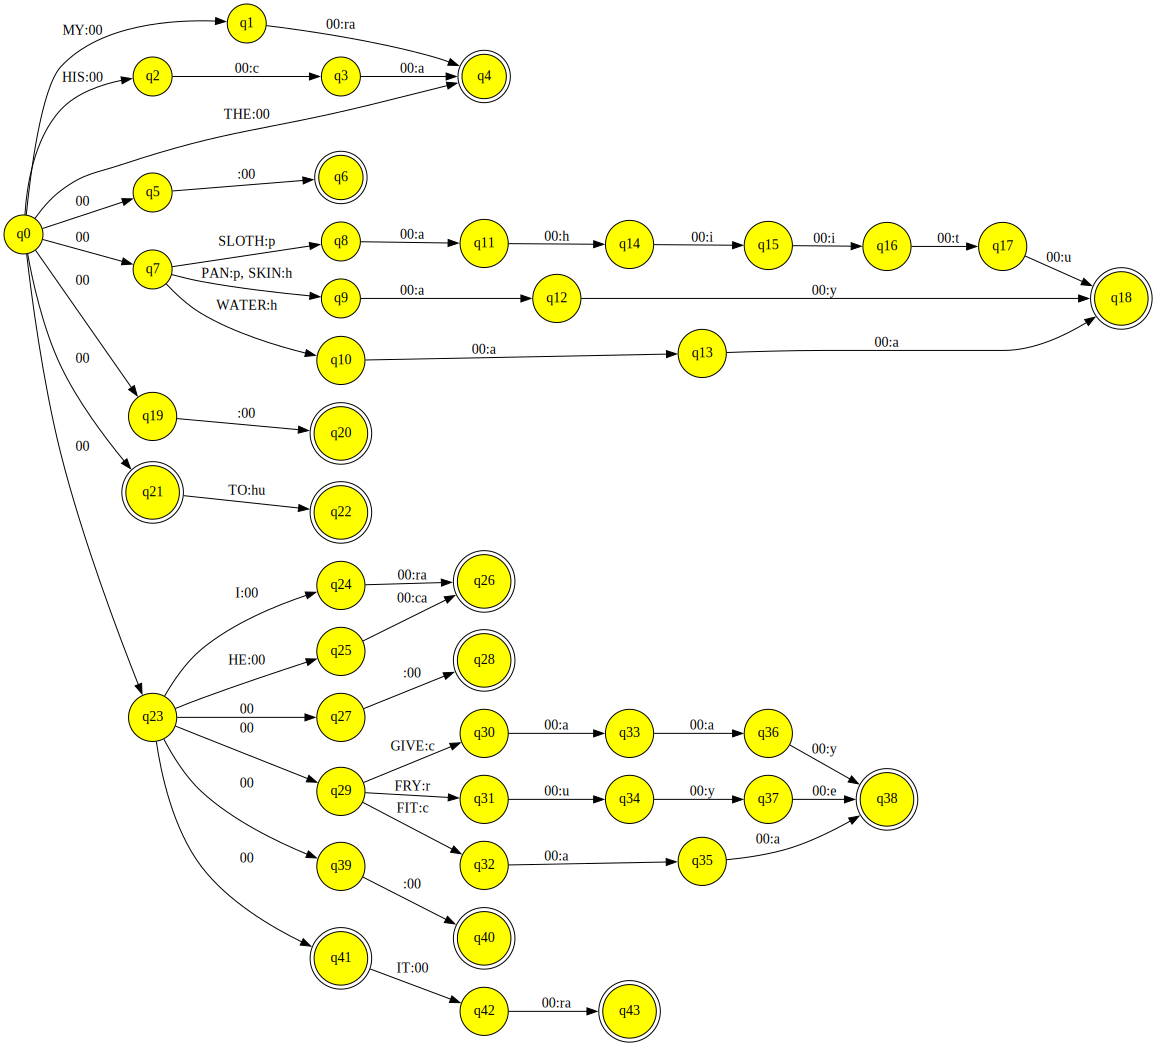

In [87]:
M = Left_L.copy()
M.disjunct(separator)
M.disjunct(LambaN)
M.disjunct(separator)
M.disjunct(Right_L)

M2 = Left_V.copy()
M2.disjunct(separator)
M2.disjunct(LambaV)
M2.disjunct(separator)
M2.disjunct(Right_V)

M.disjunct(M2)

M.view()

In [88]:
LambaMOR = M.copy()
LambaMOR.repeat_plus()

In [89]:
x = LambaPHRASE.copy()
x.compose(LambaMOR)
# sample_input(x)
sample_output(x)

['haa', 'cahay', 'cahaahu', 'capayhu', 'hayhu']

# Rules 1 y-metathesis

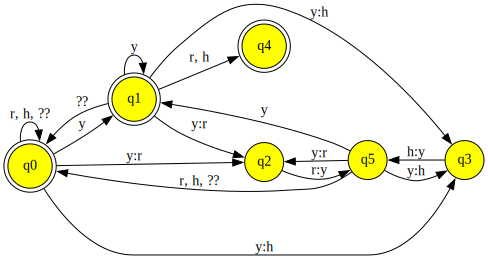

In [108]:
MT = hfst.regex(" [y h] -> [ h y], [y r] -> [r y] ||  _ ?")
MT.view()

In [110]:
apply_rules('payhu',[MT])
apply_rules('cacaayra',[MT])

payhu
pahyu
cacaayra
cacaarya


# rule2  y insertion

In [259]:
IY = hfst.regex(" h -> hy, p ->[p l y], c->cy, r->ry ||  [ r a ] _ [  a | u ] ")
apply_rules('rahaa',[MT,IY])
apply_rules('rapahiitu',[MT,IY])
apply_rules('racaara',[MT,IY])
apply_rules('raruye',[MT , IY])

end_IY = hfst.regex(" [ r a ] -> [ r y a] ||  _ .#. ")

apply_rules('raruyera',[end_IY, MT,IY])

rahaa
rahaa
rahyaa
rapahiitu
rapahiitu
raplyahiitu
racaara
racaara
racyaara
raruye
raruye
raryuye
raruyera
raruyerya
raruyerya
raryuyerya


# rule3 ay-e vowel fronting

In [260]:
EY = hfst.regex(" [a a y] -> e e, [a y] -> e || [ r a ? ] _  ")
apply_rules('rahay',[EY, MT, IY])
apply_rules('racaay',[EY ,MT, IY])
apply_rules('racaayra',[end_IY, EY ,MT, IY])

rahay
rahe
rahe
rahe
racaay
racee
racee
racee
racaayra
racaayrya
raceerya
raceerya
raceerya


In [261]:
defs['MT'] = MT
defs['IY'] = IY
defs['EY'] = EY
defs['endIY'] = end_IY
LambaPHON = hfst.regex(' endIY .o. EY .o.  MT  .o. IY ', definitions=defs)
LambaPHON.minimize()


apply_rules('rahay',[LambaPHON])
apply_rules('rahaahu',[LambaPHON])
apply_rules('racaay',[LambaPHON])
apply_rules('racaara',[LambaPHON])

rahay
rahe
rahaahu
rahyaahu
racaay
racee
racaara
racyaarya


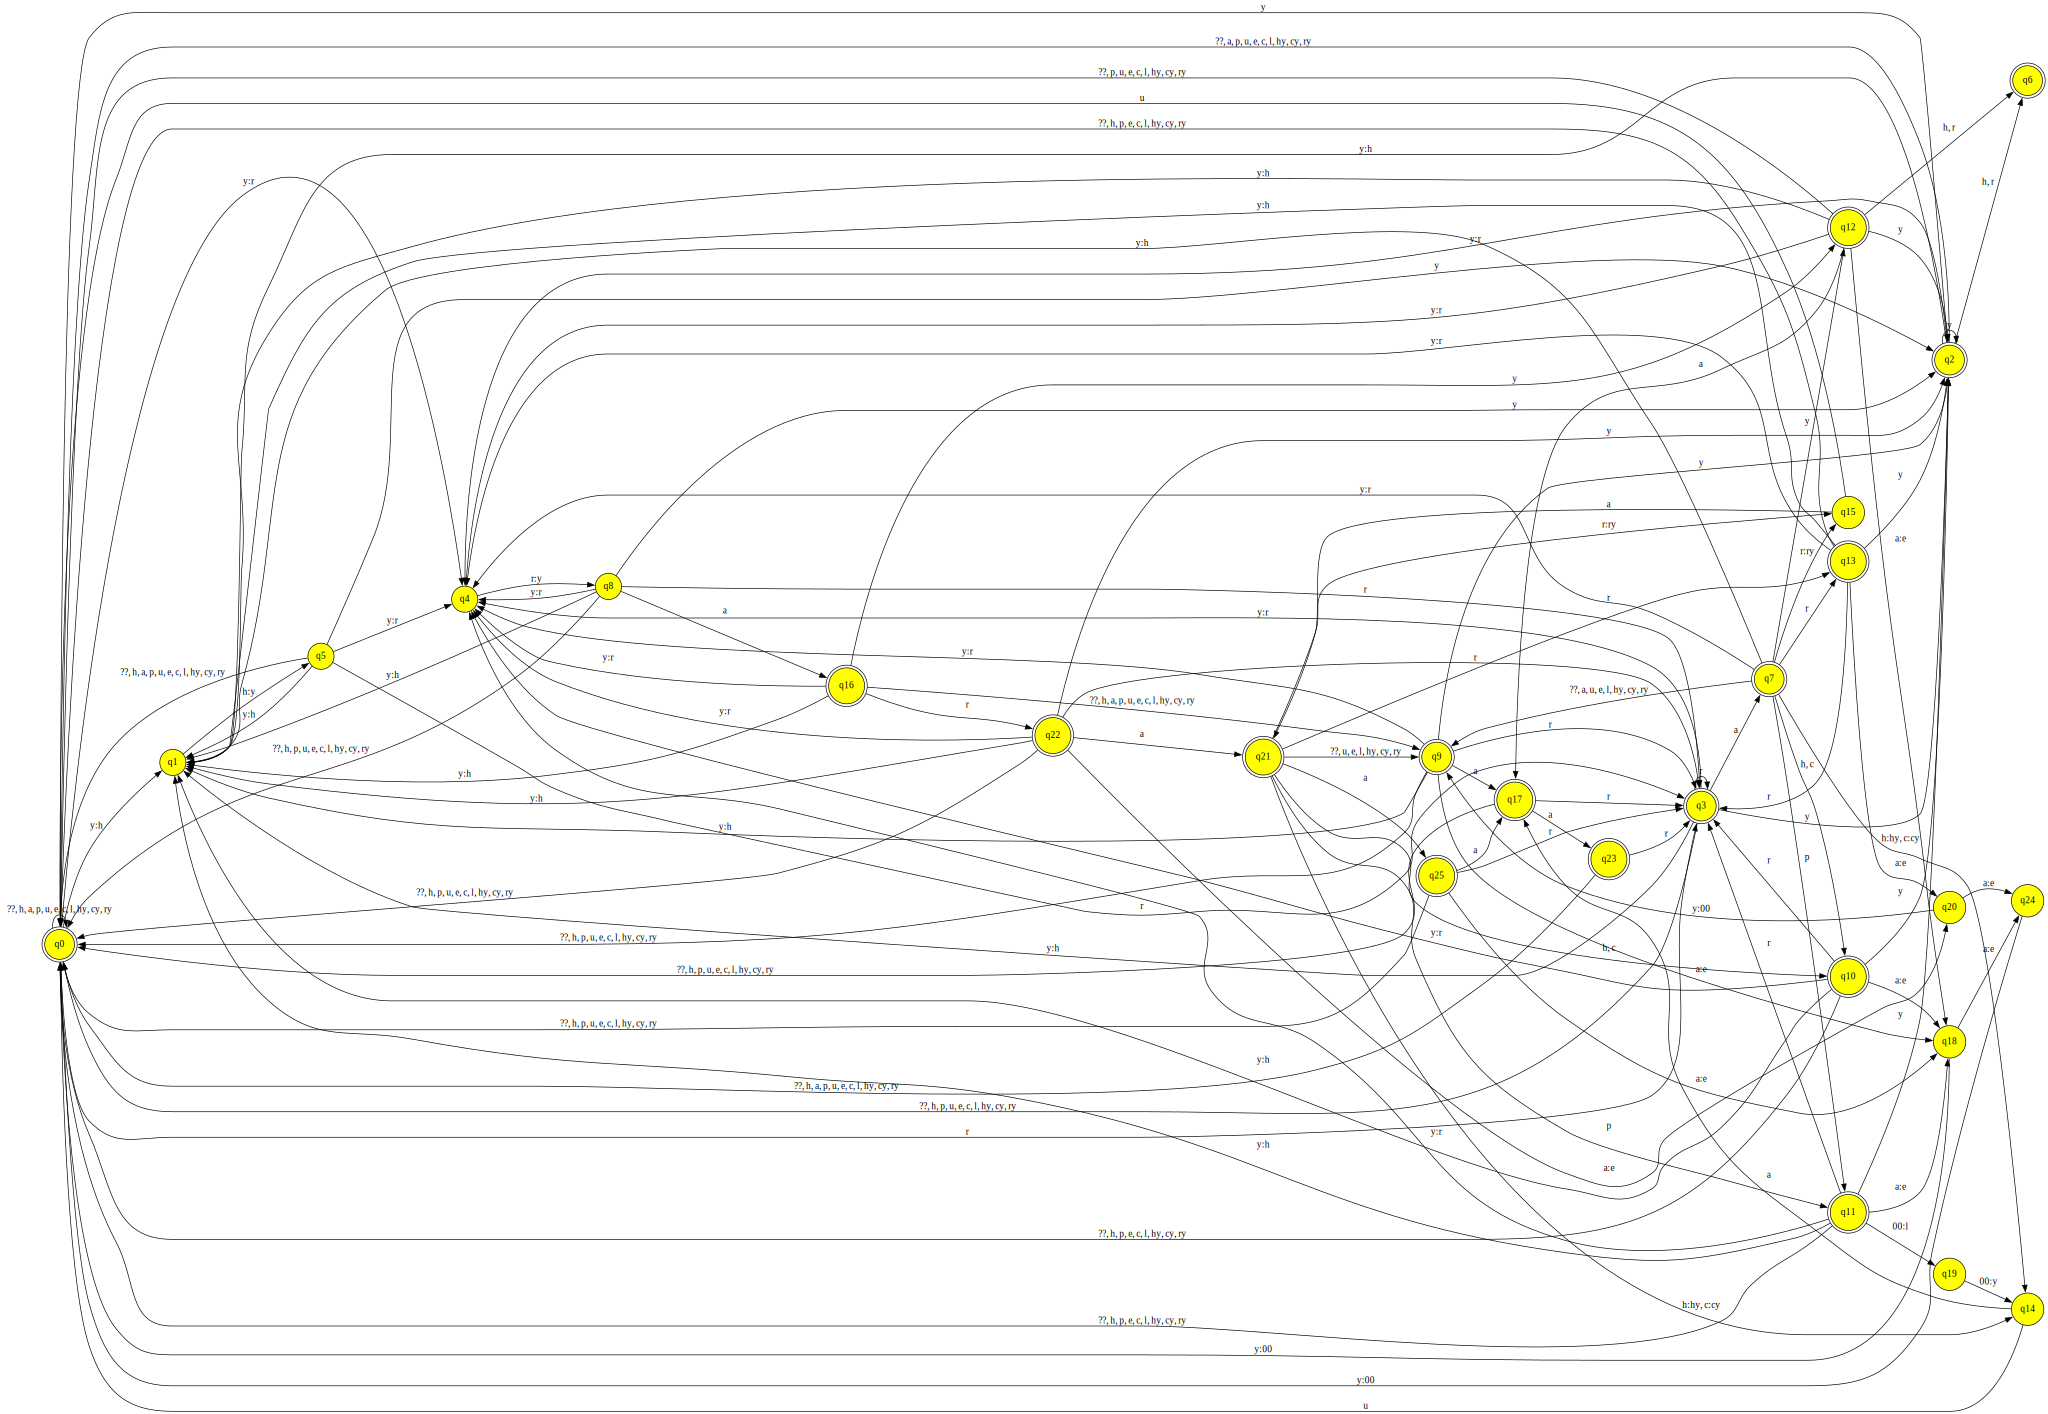

In [129]:
LambaPHON.view()

In [111]:
defs['LambaPHON'] = LambaPHON
defs['LambaPHRASE'] = LambaPHRASE
defs['LambaMOR'] = LambaMOR
defs.keys()

dict_keys(['TagalogM', 'LambaPHON', 'LambaPHRASE', 'LambaMOR'])

In [151]:
Lamba = hfst.regex('[LambaPHRASE .o. LambaMOR .o. LambaPHON]', definitions=defs)
Lamba.minimize()

# TAGALOG

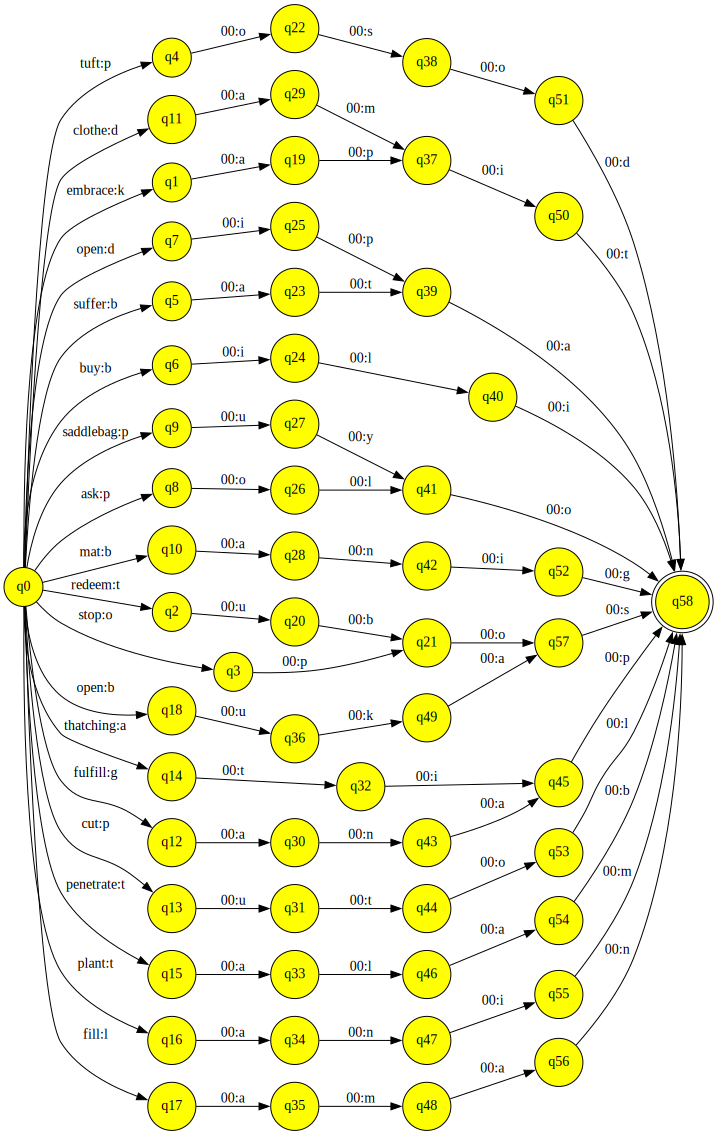

In [158]:
Tagalog_expr = ''' [open .x. {bukas}]  |
[embrace .x. {kapit}] |
[redeem .x. {tubos}] |
[stop .x. {opos}] |
[tuft .x. {posod}] |
[suffer .x. {bata}] |
[buy .x. {bili}] |
[open .x. {dipa}] |
[ask .x. {polo}] |
[saddlebag .x. {puyo}] |
[mat .x. {banig}] |
[clothe .x. {damit}] |
[fulfill .x. {ganap}] |
[cut .x. {putol}] |
[thatching .x. {atip}] |
[penetrate .x. {talab}] |
[plant .x. {tanim}]|
[fill .x. {laman}]
'''
TagalogM = hfst.regex(Tagalog_expr)
TagalogM.view()

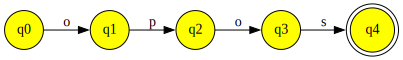

In [99]:
defs = {'TagalogM':TagalogM}
Tagalog1 = hfst.regex('[stop .o. TagalogM].l', definitions=defs)
Tagalog1.view()

In [152]:
infl = hfst.regex(' IN : in | AN : an | 0:0 ')

In [156]:
TagalogPHRASE = TagalogM.copy()
TagalogPHRASE.input_project()
separator = hfst.regex('" ":0')
separator_up = separator.copy()
separator_up.input_project()
Infl_up = infl.copy()
Infl_up.input_project()
TagalogPHRASE.concatenate(separator_up)
TagalogPHRASE.concatenate(Infl_up)

In [159]:
sample_output(TagalogPHRASE)

['saddlebag ', 'fill ', 'open IN', 'thatching IN', 'penetrate ']

In [161]:
M = TagalogM.copy()
M.disjunct(separator)
M.disjunct(infl)
TagalogMOR = M.copy()
TagalogMOR.repeat_plus()

In [164]:
x = TagalogPHRASE.copy()
x.compose(TagalogMOR)
sample_output(x)

['bili', 'biliin', 'tubosin', 'kapit', 'posodin']

In [229]:
Cons = hfst.regex("b | d | k | g | l | m | n | p | r | s | t  | v | z | ŋ")
Stops = hfst.regex("b | d | k | g | p | t")
Vowel = hfst.regex("e | a | i | o | u")
defs = {"C":Cons,"V":Vowel, "S":Stops}

# rule 1 Syncope

In [206]:
Syncope =  hfst.regex(" V-> 0  || ?* V C _ C V n",definitions=defs)
apply_rules('bukasin',[Syncope])
apply_rules('bukasan',[Syncope])
apply_rules('kapatin',[Syncope])
apply_rules('tubosin',[Syncope])

bukasin
buksin
bukasan
buksan
kapatin
kaptin
tubosin
tubsin


# Rule 2 O2U

In [192]:
o2u = hfst.regex(" o -> u || ?* _ C o [C|0] V n",definitions=defs)
apply_rules('oposin',[o2u , Syncope])
apply_rules('posodin',[o2u, Syncope])


oposin
uposin
upsin
posodin
pusodin
pusdin


# Rule 3 end vowel silence

In [195]:
silence = hfst.regex(" V -> h || ?* _ V n",definitions=defs)
apply_rules('batain',[o2u , Syncope, silence])
apply_rules('bataan',[o2u, Syncope, silence])
apply_rules('biliin',[o2u, Syncope, silence])
apply_rules('dipaan',[o2u, Syncope, silence])
apply_rules('poloin',[o2u, Syncope, silence])
apply_rules('puyoin',[o2u, Syncope, silence])

batain
batain
batain
bathin
bataan
bataan
bataan
bathan
biliin
biliin
biliin
bilhin
dipaan
dipaan
dipaan
diphan
poloin
puloin
puloin
pulhin
puyoin
puyoin
puyoin
puyhin


the missing one first is: puyhan

In [196]:
apply_rules('puyoan',[o2u, Syncope, silence])

puyoan
puyoan
puyoan
puyhan


# rule 4 nasal change 

In [230]:
nasal_ng = hfst.regex(" n -> ŋ || ?* V _ i S V n",definitions=defs)
apply_rules('banigin',[nasal_ng , o2u, Syncope, silence])

banigin
baŋigin
baŋigin
baŋgin
baŋgin


In [217]:
nasal_m = hfst.regex(" n -> m || ?* V _ a C V n",definitions=defs)
apply_rules('ganapin',[nasal_ng , nasal_m, o2u, Syncope, silence])

ganapin
ganapin
gamapin
gamapin
gampin
gampin


# rule 5 metathesis


In [233]:
meta = hfst.regex(" [t p] -> [p t], [l b]-> [b l],[ n m ] -> [m n]|| ?* V _ V n",definitions=defs)
apply_rules('atipin',[nasal_ng , nasal_m, o2u, Syncope, silence, meta])

atipin
atipin
atipin
atipin
atpin
atpin
aptin


In [234]:
apply_rules('talaban',[nasal_ng , nasal_m, o2u, Syncope, silence, meta])

talaban
talaban
talaban
talaban
talban
talban
tablan


the missing is tablin

In [235]:
apply_rules('talabin',[nasal_ng , nasal_m, o2u, Syncope, silence, meta])

talabin
talabin
talabin
talabin
talbin
talbin
tablin


In [236]:
apply_rules('tanimin',[nasal_ng , nasal_m, o2u, Syncope, silence, meta])

tanimin
tanimin
tanimin
tanimin
tanmin
tanmin
tamnin


In [237]:
apply_rules('lamanin',[nasal_ng , nasal_m, o2u, Syncope, silence, meta])

lamanin
lamanin
lamanin
lamanin
lamnin
lamnin
lamnin


the rules are perfectly set now.

In [242]:
defs['nang'] = nasal_ng
defs['nam'] = nasal_m
defs['meta'] = meta
defs['silence'] = silence
defs['ou'] = o2u
defs['Syncope'] = Syncope
defs.keys()

dict_keys(['C', 'V', 'S', 'nasal_ng', 'nasal_m', 'meta', 'silence', 'o2u', 'Syncope', 'nang', 'nam', 'ou'])

In [243]:
TagalogPHON = hfst.regex('nang .o. nam .o.  ou .o. Syncope .o. silence .o. meta', definitions=defs)

In [245]:
apply_rules('lamanin',[TagalogPHON])

lamanin
lamnin


In [247]:
defs['TagalogPHRASE'] = TagalogPHRASE
defs['TagalogMOR'] = TagalogMOR
defs['TagalogPHON'] = TagalogPHON

In [248]:
Tagalog = hfst.regex('TagalogPHRASE .o. TagalogMOR .o. TagalogPHON', definitions=defs)